# Pymaceuticals Inc.
---

### Analysis

- Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

Out of the four most promising drug treatments, there was only one outlier. The outlier was found in the Infubinol treatment. This may support a claim that the result of the four drug treatments can be generally predicted to fall into a range of tumor volume (mm3) for each mouse. Since there was only one outlier within the four treatments, the data from each treatment can be studied and conclusions can be inferred since the statisctical power of the data is not signicantly skewed by a large number of outliers. Simply, outliers do not have a large impact on the statisctical analyses of the four most promising drug treatments.


Additionally, the IQR for each of the four most promising drug treatments can be used an indicator of the specific drug treatments variability. The smallest IQR was for Capomulin (7.781) followed closely by Ramicane (9.09). The IQR for the other two treatments, Infubinol and Ceftamin, were 11.47 and 15.57 respectively. It can be inferred that the results of the treatment for Capomulin and Ramicane are more predictable, hence more reliable, since the tumor volume (mm3) falls in a more specific range than the other two. Moreover, the tumor volume(mm3) is significantly lower in mice that undergo Capolmulin and Ramicane treatments. The lower and upper bound for Capomulin is 20.70(mm3) and 51.83(mm3), and for Ramicane 17.91(mm3) and 54.30(mm3). Compare that to the lower and upper bound for Infubinol (36.83 and 82.74(mm3)) and Ceftamin (25.35 and 87.66(mm3)), the tumor volume (mm3) is much lower after mice are treated with Capomulin and Ramicane. Looking at the means of each treatment also supports the claim that Capomulin and Ramicane were most effective in lowering tumor volume (mm3). The mean tumor volume(mm3) for Capomulin and Ramicane were 40.67(mm3) and 40.21(mm3). The mean of the other 6 drug treatments tumor volume(mm3) fell between 52.59mm3 (for Ceftamin) and 55.23mm3 (for Ketapril). The tumor volume(mm3) found in Capomulin and Ramicane was significanyly lower than each of the other 6 drug treatments. It can be inferred that Capomulin and Ramicane are more effective at lowering tumor volume(mm3) than the other 6 drug treatments in this study. 

After conducting a linear regression analyses of the weight of a mouse(g) versus average tumor volume(mm3) for Capomulin, it can be inferred that the drug treatments effectiveness is affected by the weight of the mouse(g). The heavier the mouse, the less effective a drug treatment is in lowering the average tumor volume(mm3). There is a positive correlation between the weight of the mouse and the tumor volume(mm3) found after treatment. Since the r-value correlation between the two is 0.95, we can make a reliable conclusion that there is a positive correlation between the two. 

1) The data is reliable, only 1 outlier from the 4 most promising drug treatments.
2) Capomulin and Ramicane were far more effective in lowering tumor volume(mm3) than the other 6 drug treatments in the study.
3) The drug treatment is less effective for heavier mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# using Outer Join to merge the two DataFrames

merged_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
numberofmice = merged_df["Mouse ID"].nunique()
numberofmice

249

### Duplicates

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_duplicate = duplicate_ID.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="last")
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_ID = clean_df["Mouse ID"].nunique()
clean_mice_ID

248

# Summary Statistics
Data has been Prepared (Removed Duplicate ID from DataFrame)

Compute and Generate Summary Statistics 

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean, median, variance, standard deviation, and SEM of the tumor volume.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean = grouped_df.mean()
median = grouped_df.median()
variance = grouped_df.var()
std_dev = grouped_df.std()
sem = grouped_df.sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'SEM': sem
})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Aggregrated Summary

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_aggregate = grouped_df.agg(["mean","median","var","std","sem"])

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Create Bar and Pie Charts 

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#first calculate the total number of rows for each Drug Regimen using Value Counts
micecount = clean_df["Drug Regimen"].value_counts()
micecount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

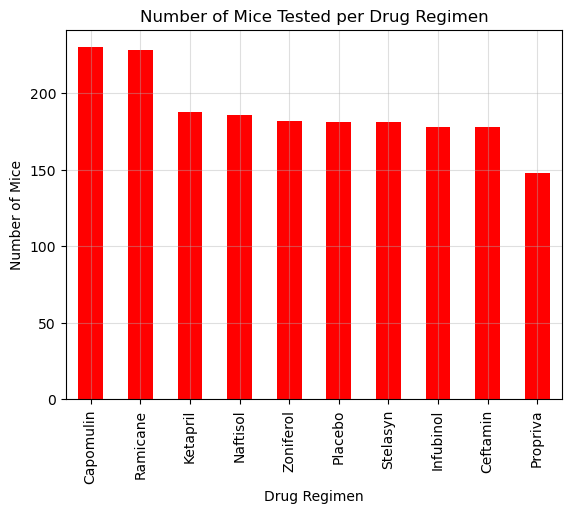

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plot = micecount.plot.bar(color="r", )

#Creating Labels for the Pandas Bar Chart

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Drug Regimen")
plt.grid(alpha=0.4)


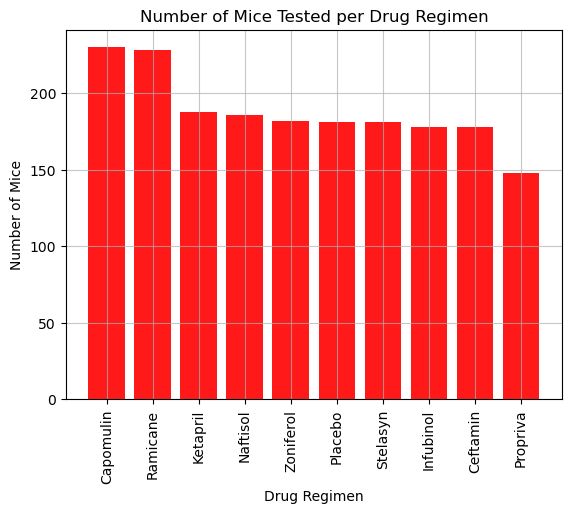

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Define x and y axis values

x_axis = micecount.index.values
y_axis = micecount.values

#Creating Pyplot Bar Chart

plt.bar(x_axis, y_axis, color="r",alpha=0.9)

#Labeling x and y axis, title
plt.xticks(rotation="vertical")
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.grid(alpha=0.7)

#Display Pyplot Bar Chart
plt.show()

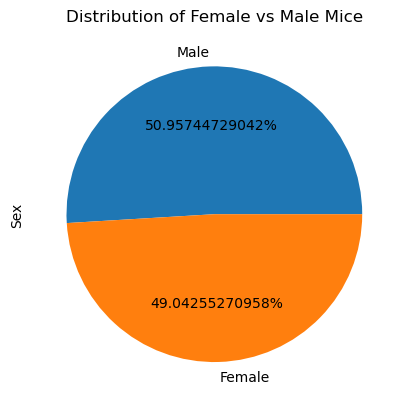

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df["Sex"].value_counts()
plt.title("Distribution of Female vs Male Mice")
gender_dist.plot.pie(autopct = "%1.11f%%")

#Display Pie Plot using Pandas
plt.show()

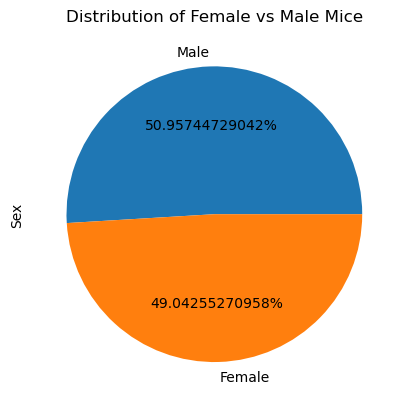

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [50.95744729042,49.04255270958]
labels = ["Males","Female"]
plot = gender_dist.plot.pie(autopct="%1.11f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

#Display Pie Chart using pyplot

plt.show()

## Quartiles, Outliers and Boxplots

- Calculate Final Tumor Volume across 4 of the most promising treatment regimens
- Calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens

Steps

- Create grouped DF showing the last time point for each mouse. Merge this grouped DF with the origninal clean_df
- Create a List that holds the treatment names and an additional empty list to hold the tumor volume data
- Loop through each drug in the treatment list, locating the rows in the merged DF corresponding to each treatment
- Append the resulting final tumor volumes for each drug to the empty list
- Lastly, determine the outliers by using upper and lower bounds, and print the results

Matplotlib

- Using Matplotlib, generate a box plot that displays the distribution of the final tumor volume for all mice in each group
- Format: Highlight any potential outliers in the plot by changing their color and style

- Hint: all four box plots should be in the same figure

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#Creating a DataFrame for each of the 4 most promising treatment regimens

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

#last_timepoint_df = merged_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()


#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Calculating final tumor volume for Capomulin

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
#Last Timepoint volume
Capomulin_merge.to_csv("output.csv")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

#Capomulin_tumor_vol = Capomulin_merge["Tumor Volume (mm3)"]

#Calculating Outliers using IQR

Cap_quartiles = Capomulin_tumors.quantile([0.25,0.5,0.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq - Cap_lowerq

Cap_lowerbound = Cap_lowerq - (Cap_iqr * 1.5)
Cap_upperbound = Cap_upperq + (Cap_iqr * 1.5)




print(f"The lower quartile of Capomulin tumors: {Cap_lowerq}")
print(f"The upper quartile of Capomulin tumors: {Cap_upperq}")
print(f"The interquartile range of Capomulin tumors is: {Cap_iqr}")

print(f"Values below {Cap_lowerbound} may be outliers")
print(f"Values above {Cap_upperbound} may be outliers")





The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
Values below 20.70456164999999 may be outliers
Values above 51.83201549 may be outliers


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Calculating final tumor volume for Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Calculating final tumor volume for Infubinol

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Calculating final tumor volume for Ceftamin

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


# Finding Max Timepoint

In [19]:
#Finding Max (Last) Timepoint for each mouse

last_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
last_timepoint

merged_df = pd.merge(clean_df, last_timepoint, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


## Calculating number of outliers, lowerbound, upperbound and iqr for each drug in the list

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatment_list:

    drug_data = merged_df.loc[merged_df["Drug Regimen"]==drug]
    
    final_volume = drug_data.loc[drug_data["Timepoint"]==drug_data["max_timepoint"]]
    
    final_volumes = final_volume["Tumor Volume (mm3)"]
    
    
   # add subset   
    
    tumor_volume.append(final_volumes)
        
    quartiles = final_volumes.quantile([0.25,.5,0.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound =  lowerq - (1.5 * iqr)
    upper_bound = upperq +(1.5 * iqr)
   
 # Determine the number of outliers
    
    outliers = final_volumes[(final_volume["Tumor Volume (mm3)"] <= lower_bound) | (final_volume["Tumor Volume (mm3)"] >= upper_bound)].count()

 # Print Statement and Display IQR, lowerbound, upperbound and number of outliers for each of the 4 drugs in the treatment list

    print(f"\n")
    print(f"IQR for {drug}: {iqr}")
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    print(f"Number of {drug} outliers: {outliers}")
    print(f"\n")






IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0




IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0




IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1




IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0




## Box Plot

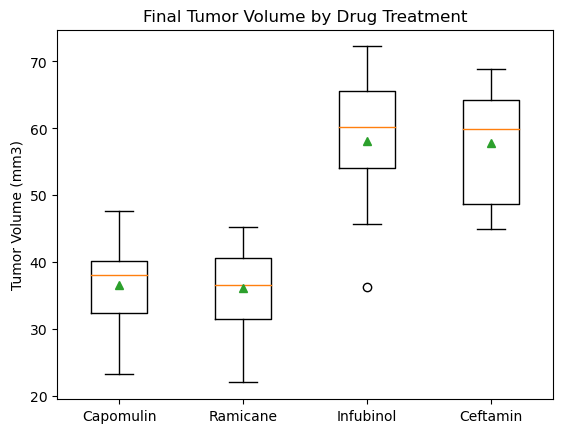

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

format = dict(marker="o")

plt.boxplot(tumor_volume, flierprops = format, showmeans=True)
plt.title("Final Tumor Volume by Drug Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

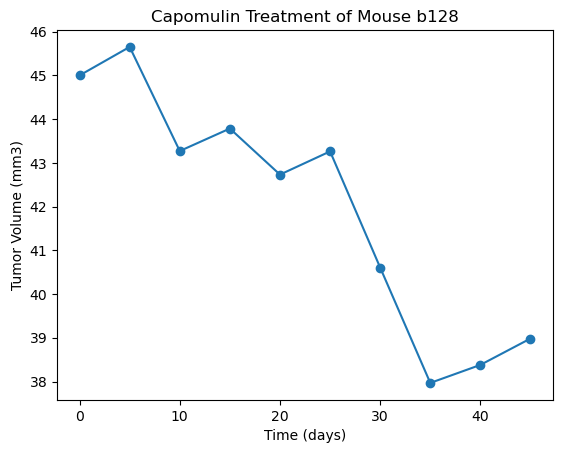

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_treatment = clean_df.loc[clean_df["Mouse ID"] == "b128"]


plt.plot(mouse_treatment['Timepoint'],mouse_treatment["Tumor Volume (mm3)"], marker = "o")


plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()

C:\Users\Albert Dudek\AppData\Local\Temp\ipykernel_18884\3050049264.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumor_volume = capomulin_treatment.groupby(["Mouse ID"]).mean()


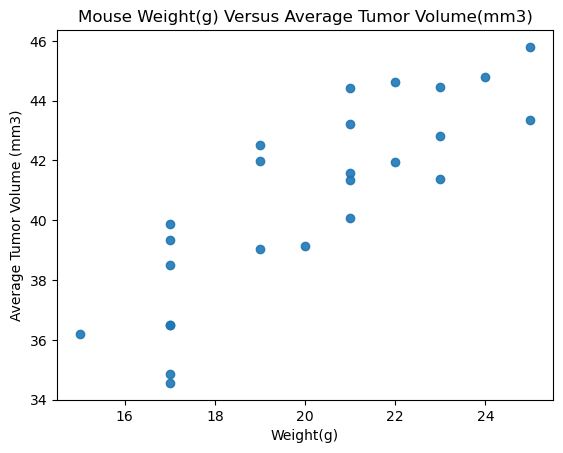

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatment = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_treatment.groupby(["Mouse ID"]).mean()

#Generate x and y values for scatter plot

x_values = avg_tumor_volume["Weight (g)"]
y_values = avg_tumor_volume["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values,alpha=0.9)
plt.title("Mouse Weight(g) Versus Average Tumor Volume(mm3)")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_model = st.pearsonr(avg_tumor_volume["Weight (g)"],avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The Correlation between the mouse weight(g) and the average tumor volume(mm3) is {round(correlation_model[0],2)}")

The Correlation between the mouse weight(g) and the average tumor volume(mm3) is 0.84


## Linear Regression

The Correlation between the mouse weight(g) and the average tumor volume(mm3) is 0.84
The Coefficient of Determination between the mouse weight(g) and the average tumor volume(mm3) is 0.7089


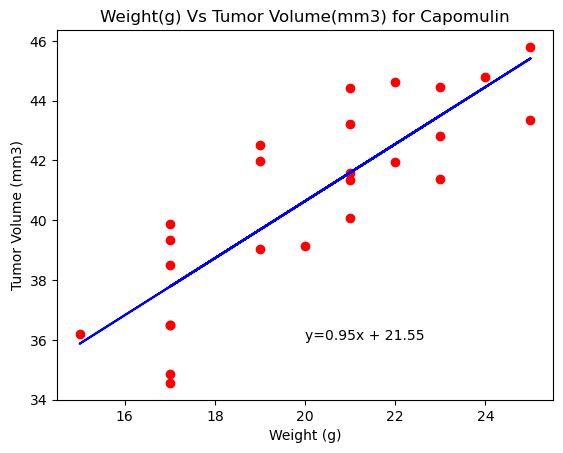

In [25]:
(m_slope,m_int, m_r,m_p,m_std_err) = st.linregress(avg_tumor_volume["Weight (g)"],avg_tumor_volume["Tumor Volume (mm3)"])

m_fit = m_slope * avg_tumor_volume["Weight (g)"] + m_int
line_equation=f"y={round(m_slope,2)}x + {round(m_int,2)}"
plt.scatter(avg_tumor_volume["Weight (g)"],avg_tumor_volume["Tumor Volume (mm3)"],color="r")
plt.plot(avg_tumor_volume["Weight (g)"],m_fit,color="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight(g) Vs Tumor Volume(mm3) for Capomulin")
plt.annotate(line_equation,(20,36))

#For Fun

#coefficient_of_determination = m_r**2 

print(f"The Correlation between the mouse weight(g) and the average tumor volume(mm3) is {round(correlation_model[0],2)}")

print(f"The Coefficient of Determination between the mouse weight(g) and the average tumor volume(mm3) is {round(m_r**2,4)}")

plt.show()
